# PyQuil example:  QFT adder
Based on Draper adder (https://arxiv.org/pdf/quant-ph/0008033.pdf)

* Gines Carrascal, Complutense University of Madrid

https://github.com/gines-carrascal/jupyter-pyquil

In [53]:
from pyquil import get_qc, Program
from pyquil.gates import H, X, CPHASE, MEASURE
from pyquil.latex import to_latex, display
from pyquil.quil import address_qubits
from pyquil.quilatom import QubitPlaceholder
from math import pi

In [54]:
sumando_1 = input("Primer sumando en binario (4 bits)")
sumando_2 = input("Segundo sumando en binario(4 bits)")

Primer sumando en binario (4 bits)0001
Segundo sumando en binario(4 bits)0001


In [55]:
n = 4

n+=1

p = Program()


a = QubitPlaceholder.register(n)
b = QubitPlaceholder.register(n)

ro = p.declare('ro', 'BIT', n)

for i in range(1,n):
    if sumando_1[i-1] == "1":
        p += X(a[n - (i+1)])
for i in range(1,n):
    if sumando_2[i-1] == "1":
        p += X(b[n - (i+1)])
        
# Take the QFT.
# Iterate through the target.
for i in range(n,0,-1):
    # Apply the Hadamard gate to the target.
    p += H(b[i-1])

    # Iterate through the control.
    for j in range(i-1,0,-1):
        p += CPHASE(2*pi/2**(i-j+1), b[j-1], b[i-1])
        
# Compute controlled-phases.
# Iterate through the targets.
for i in range(n,0,-1):
    # Iterate through the controls.
    for j in range(i,0,-1):
        p += CPHASE(2*pi/2**(i-j+1), a[j-1], b[i-1])

# Take the inverse QFT.
# Iterate through the target.
for i in range(1,n+1):
    # Iterate through the control.
    for j in range(1,i):
        # The inverse Fourier transform just uses a negative phase.
        p += CPHASE(-2*pi/2**(i-j+1), b[j-1], b[i-1])

    # Apply the Hadamard gate to the target.
    p += H(b[i-1])


for i in range(n):
    p += MEASURE(b[i], ro[i])

p.wrap_in_numshots_loop(20)

print(address_qubits(p)) 

DECLARE ro BIT[5]
X 0
X 1
H 2
CPHASE(pi/2) 3 2
CPHASE(pi/4) 4 2
CPHASE(pi/8) 5 2
CPHASE(0.19634954084936207) 1 2
H 3
CPHASE(pi/2) 4 3
CPHASE(pi/4) 5 3
CPHASE(pi/8) 1 3
H 4
CPHASE(pi/2) 5 4
CPHASE(pi/4) 1 4
H 5
CPHASE(pi/2) 1 5
H 1
CPHASE(pi) 6 2
CPHASE(pi/2) 7 2
CPHASE(pi/4) 8 2
CPHASE(pi/8) 9 2
CPHASE(0.19634954084936207) 0 2
CPHASE(pi) 7 3
CPHASE(pi/2) 8 3
CPHASE(pi/4) 9 3
CPHASE(pi/8) 0 3
CPHASE(pi) 8 4
CPHASE(pi/2) 9 4
CPHASE(pi/4) 0 4
CPHASE(pi) 9 5
CPHASE(pi/2) 0 5
CPHASE(pi) 0 1
H 1
CPHASE(-pi/2) 1 5
H 5
CPHASE(-pi/4) 1 4
CPHASE(-pi/2) 5 4
H 4
CPHASE(-pi/8) 1 3
CPHASE(-pi/4) 5 3
CPHASE(-pi/2) 4 3
H 3
CPHASE(-0.19634954084936207) 1 2
CPHASE(-pi/8) 5 2
CPHASE(-pi/4) 4 2
CPHASE(-pi/2) 3 2
H 2
MEASURE 1 ro[0]
MEASURE 5 ro[1]
MEASURE 4 ro[2]
MEASURE 3 ro[3]
MEASURE 2 ro[4]



In [56]:
from pyquil import list_quantum_computers
print(list_quantum_computers())

['Aspen-7-28Q-A', 'Aspen-7-14Q-C', 'Aspen-7-13Q-C', 'Aspen-4-13Q-E', 'Aspen-7-12Q-C', 'Aspen-7-11Q-C', 'Aspen-7-10Q-C', 'Aspen-4-9Q-E', 'Aspen-7-9Q-C', 'Aspen-7-8Q-C', 'Aspen-4-8Q-F', 'Aspen-4-7Q-F', 'Aspen-7-7Q-C', 'Aspen-7-6Q-C', 'Aspen-4-6Q-F', 'Aspen-7-5Q-C', 'Aspen-4-5Q-E', 'Aspen-7-4Q-D', 'Aspen-4-4Q-D', 'Aspen-4-4Q-F', 'Aspen-7-3Q-C', 'Aspen-4-3Q-F', 'Aspen-4-3Q-G', 'Aspen-7-2Q-C', 'Aspen-4-2Q-C', 'Aspen-4-2Q-H', '9q-square-qvm', '9q-square-noisy-qvm']


In [57]:
#qvm = get_qc(str(2*n+1)+"q-qvm")

qvm = get_qc("Aspen-7-28Q-A", as_qvm=True)

In [58]:
cp = qvm.compile(address_qubits(p),protoquil=True)

In [59]:
print(cp.program)

DECLARE ro BIT[5]
RZ(pi) 13
RX(-pi/2) 13
RZ(-0.2686548790430794) 13
RX(-pi/2) 13
RZ(-0.7984163774505448) 13
RX(pi/2) 13
RZ(-1.6820171151699106) 13
RX(-pi/2) 13
RZ(pi) 14
RX(-pi/2) 14
RZ(-3.0300095284497957) 14
RX(-pi/2) 14
RZ(-2.2606347990095026) 14
RX(pi/2) 14
RZ(-0.5063807571904442) 14
RX(-pi/2) 14
CZ 14 13
RZ(-pi/2) 13
RX(pi/2) 13
RZ(-pi/2) 14
RX(-pi/2) 14
CZ 14 13
RX(-pi/2) 13
RX(pi/2) 14
CZ 14 13
RZ(pi) 25
RX(pi/2) 25
RZ(-2.6057819202452173) 25
RX(-pi/2) 25
RZ(-1.6745021561313078) 25
RX(pi/2) 25
RZ(-1.5457022924491035) 25
RX(-pi/2) 25
RX(pi/2) 12
RZ(2.9539746272941754) 12
RX(-pi/2) 12
RZ(-0.6238643135676983) 12
RX(pi/2) 12
RZ(-0.9224676621337573) 12
RX(-pi/2) 12
RZ(-1.591352912703683) 12
RX(pi/2) 12
RZ(1.099413686130776) 12
RX(-pi/2) 12
RX(pi/2) 13
RZ(-0.41445519367585515) 13
RX(-pi/2) 13
RZ(-1.8022166981889833) 13
RX(pi/2) 13
RZ(2.4405555816396802) 13
RX(-pi/2) 13
CZ 12 13
RZ(-pi/2) 12
RX(-pi/2) 12
RZ(-pi/2) 13
RX(pi/2) 13
CZ 12 13
RX(pi/2) 12
RX(-pi/2) 13
CZ 12 13
RX(pi/2) 14
RZ

In [60]:
print(cp.attributes)

{'native_quil_metadata': NativeQuilMetadata(final_rewiring=[22, 35, 32, 33, 31, 34, 21, 36, 23, 30,...], gate_depth=536, gate_volume=1949, multiqubit_gate_depth=107, program_duration=33551.85999999989, program_fidelity=0.213794228504919, qpu_runtime_estimation=3372.161865234375, topological_swaps=59), 'num_shots': 20}


In [61]:
print(len(cp.attributes['native_quil_metadata'].final_rewiring))

38


In [62]:
qvm = get_qc("Aspen-7-14Q-C", as_qvm=True)
cp = qvm.compile(address_qubits(p),protoquil=True)
print(cp.attributes)

{'native_quil_metadata': NativeQuilMetadata(final_rewiring=[25, 16, 11, 10, 12, 17, 1, 15, 14, 13,...], gate_depth=393, gate_volume=1066, multiqubit_gate_depth=89, program_duration=26451.30999999995, program_fidelity=0.29238873621926653, qpu_runtime_estimation=1928.4556884765625, topological_swaps=33), 'num_shots': 20}


In [63]:
qvm.run(cp)

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [30]:
display(cp, width=300)

AttributeError: 'PyQuilExecutableResponse' object has no attribute 'get_qubits'

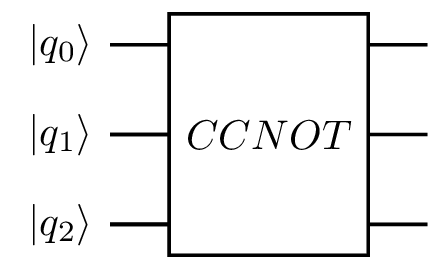

In [31]:
from pyquil.gates import CCNOT
p = Program()
p += CCNOT(0,1,2)
display(p, width=300)